In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# Directories for saving plots and finding input data
figs_dir = '/home/users/eboland/smurphs_notebooks/'
data_dir='~/smurphs/data_out/smurphs_ensemble/'

# Experiment info, don't alter
exps=['historical0p2','historical0p4','historical0p7','historical1p0','historical1p5']
runs=['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1']
exp_names=['0.2','0.4','0.7','1.0','1.5']
y_start=[1960,1980]
y_end=[1991,2011]
basins=['global','atl','pac','so','ind']
basin_name=dict(zip(basins,['Global','Atlantic','Pacific','Southern','Indian']))

# Plotting choices
clims={'so':[-12,12],
   'pac':[-14,14],
   'ind':[-6,6],
   'global':[-20,20],
   'atl':[-7,7]}
latlims={'so':[-75,-35],
          'pac':[-35,66],
          'ind':[-35,28.5],
          'global':[-75,75],
          'atl':[-35,75]}

In [4]:
ohc_yz=xr.open_dataarray(data_dir+'ohcA_yz_trend_byrun.nc')

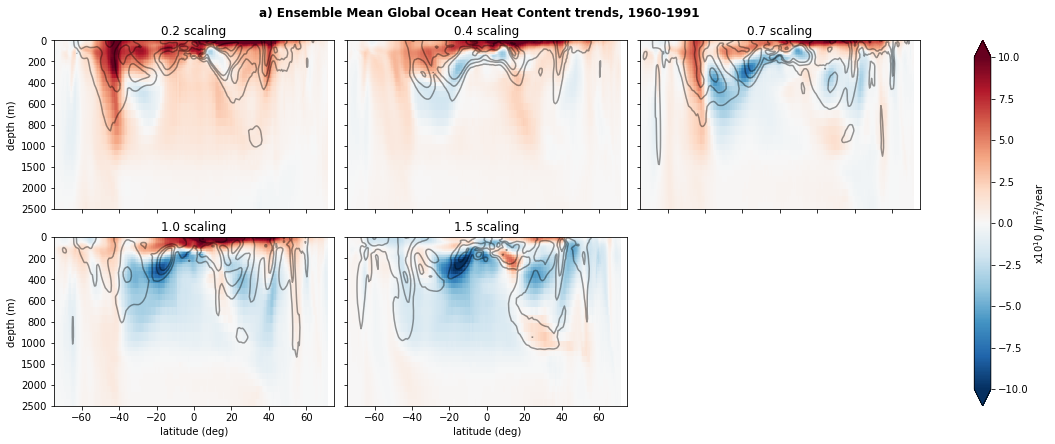

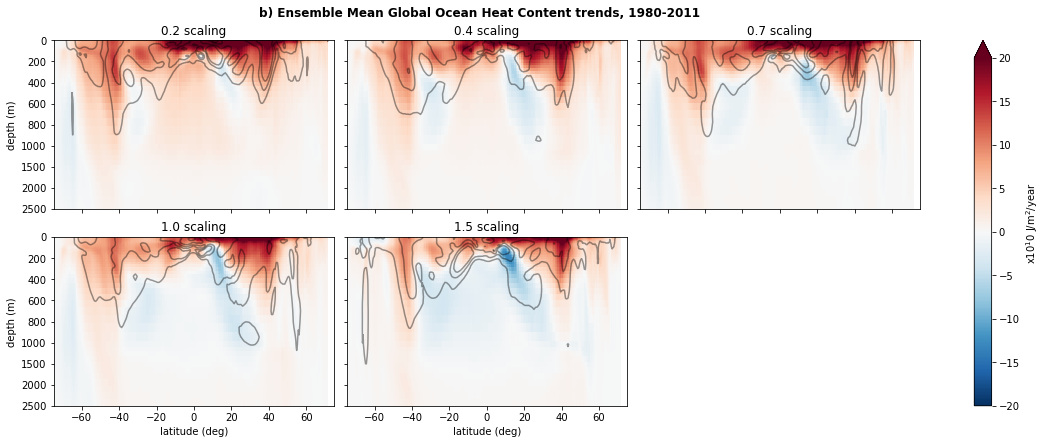

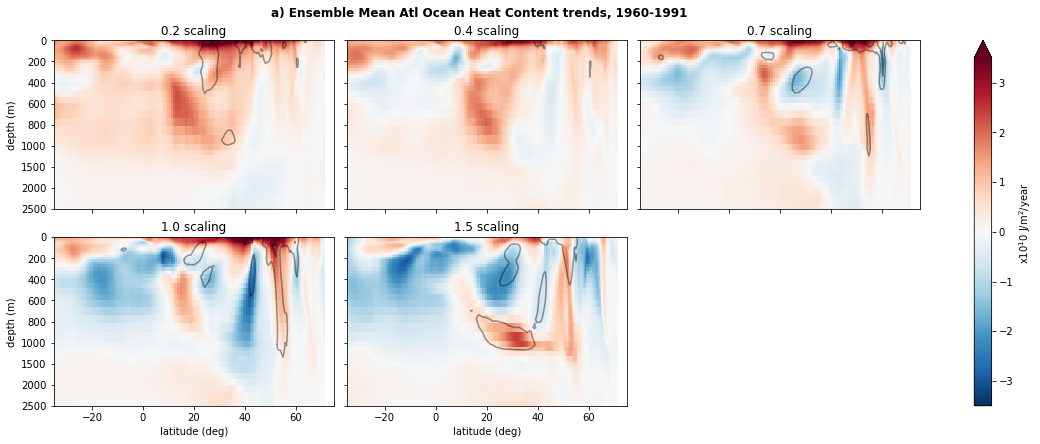

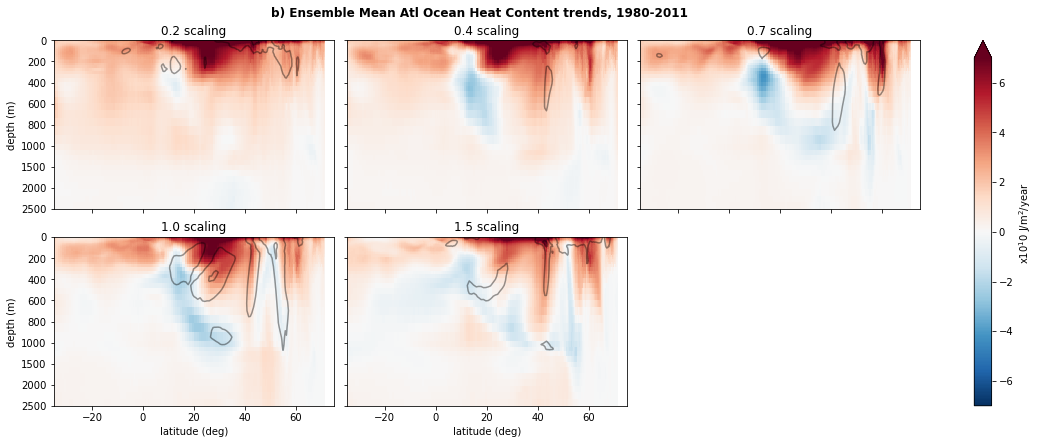

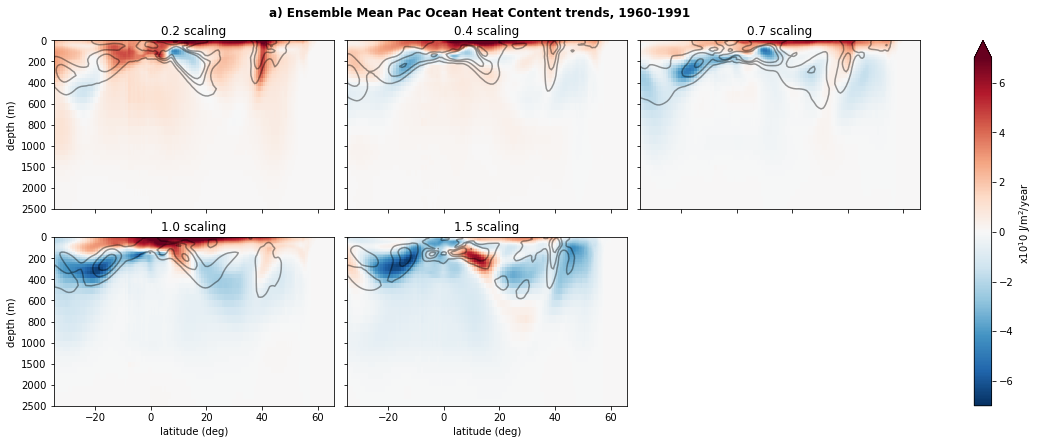

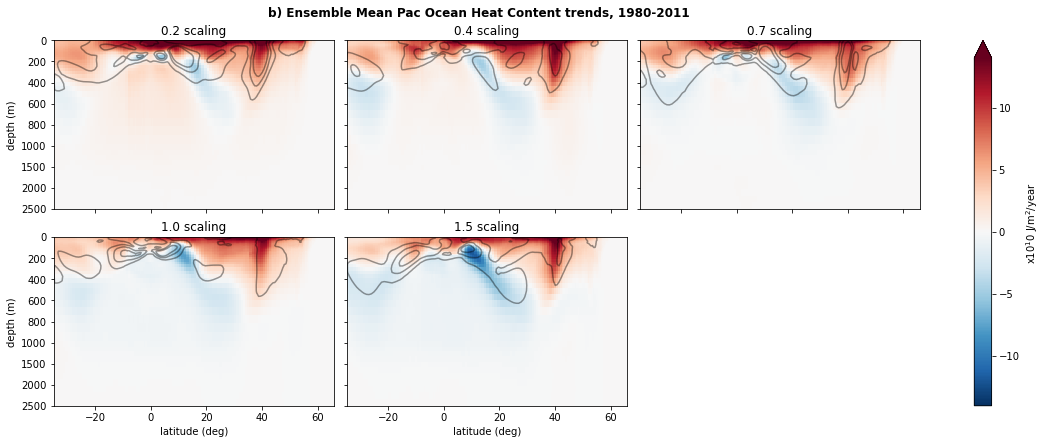

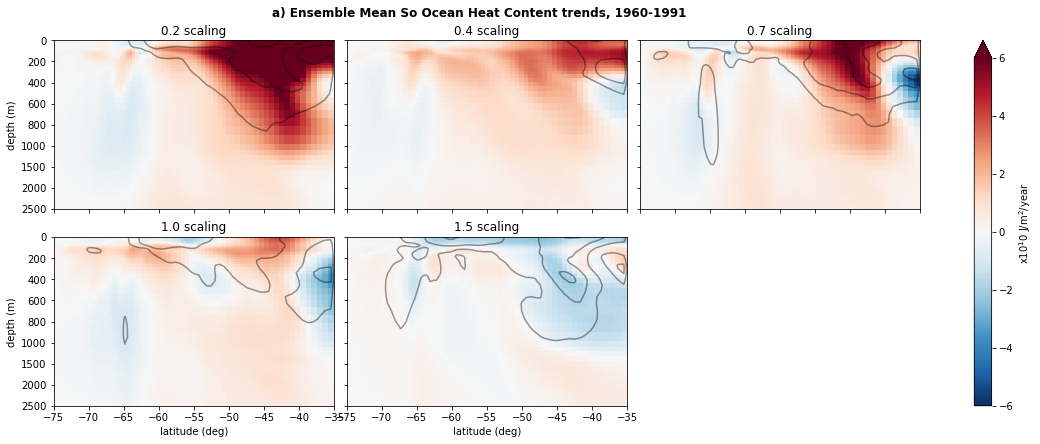

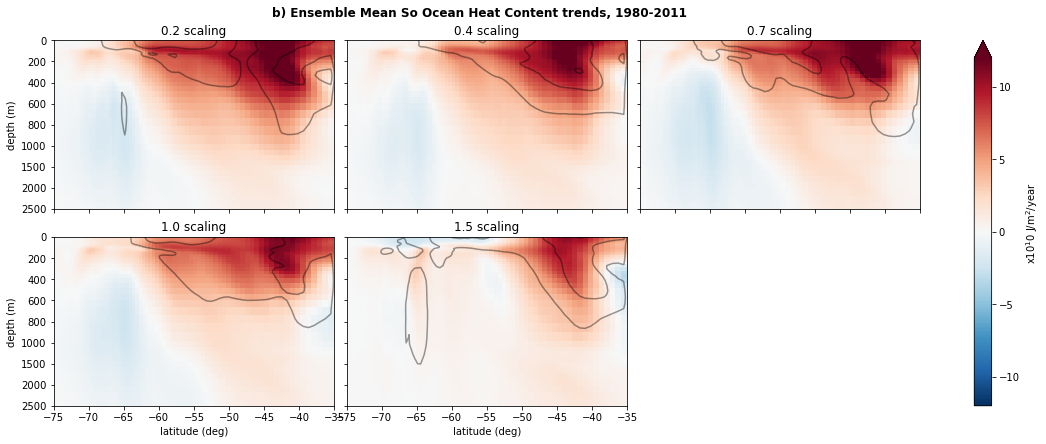

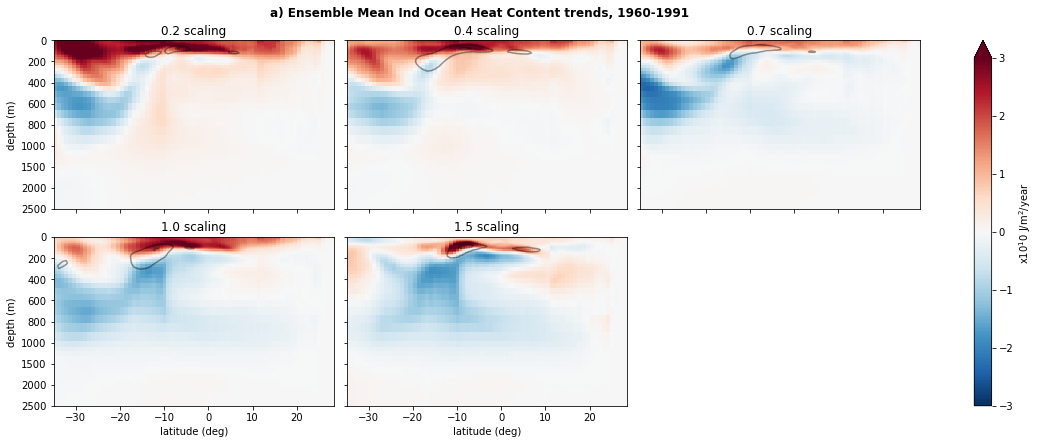

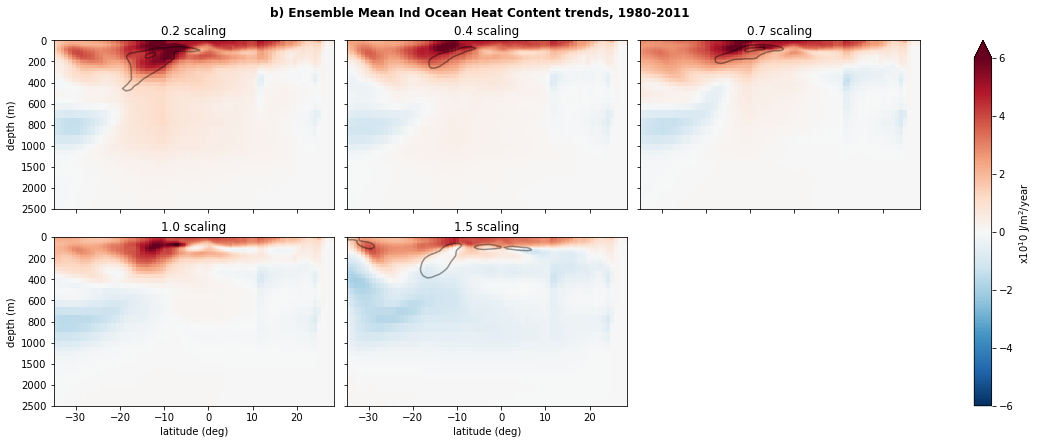

In [12]:
%matplotlib inline
for basin in basins:
    for tchunk in range(0,2):        
        vmin=clims[basin][0]
        vmax=clims[basin][1]
        if tchunk==0:
            vmin=vmin*0.5
            vmax=vmax*0.5
        dplot=ohc_yz.isel(time=tchunk).sel(basin=basin)/1e10
        dplot['depth_alt']=xr.where(dplot['deptht']<1000,dplot['deptht']*500/200,dplot['deptht']+1500)

        dplot_mean=dplot.mean(dim='run')   
        dplot_std=dplot.std(dim='run')
        p=dplot_mean.plot(x='lat',y='depth_alt',col='exp',col_wrap=3,yincrease=False,
                               figsize=[16,6],cmap='RdBu_r',
                               vmin=vmin,vmax=vmax,
                               cbar_kwargs={'label': 'x10$^10$ J/m$^2$/year'},rasterized=True)


        for ia,ax in enumerate(p.axes.flat):
            ax.set_xlim(latlims[basin][0],latlims[basin][1])        
            ax.set_ylim([4000,0])
            plt.gca().set_yticks([4000, 3500, 3000, 2500, 2000, 1500, 1000, 500, 0])
            plt.gca().set_yticklabels([2500, 2000, 1500, 1000, 800, 600, 400, 200, 0])      
            if ia<5:   
                if tchunk==0:
                    levels=[2,3.5,5]
                else:
                    levels=[2,4,6]
                dplot_std.isel(exp=ia).plot.contour(x='lat',y='depth_alt',
                                                    levels=levels,
                                                    colors='k',alpha=0.4,ax=ax,yincrease=False)            
                ax.set(title=exp_names[ia]+' scaling')      
            if ia<3:
                ax.set(xlabel='')
            else:
                ax.set(xlabel='latitude (deg)')   
            if (ia == 0) | (ia == 3):
                ax.set(ylabel='depth (m)')
            else:
                ax.set(ylabel='')
        plt.suptitle(chr(ord('a')+tchunk)+') Ensemble Mean '+basin.capitalize()+' Ocean Heat Content trends, '+str(y_start[tchunk])+'-'+str(y_end[tchunk]),weight='bold',x=0.42,y=1.02)
        plt.savefig(figs_dir+'Fig5_OHU_yz_runmean_'+basin+'_'+str(y_start[tchunk])+str(y_end[tchunk])+'a.png',bbox_inches='tight')
        plt.savefig(figs_dir+'Fig5_OHU_yz_runmean_'+basin+'_'+str(y_start[tchunk])+str(y_end[tchunk])+'a.pdf',bbox_inches='tight')
